In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('housingtrain.csv',usecols=['BsmtQual', 'FireplaceQu', 'GarageType'])
df.head()

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd


In [3]:
df.isnull().sum()/len(df)

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
dtype: float64

In [4]:
for col in df.columns:
    print(df[col].value_counts())

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


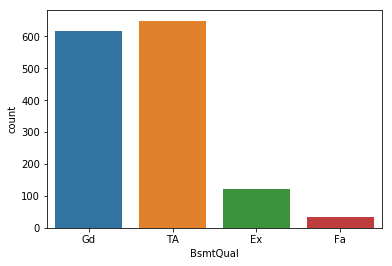

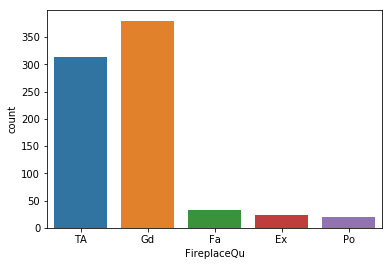

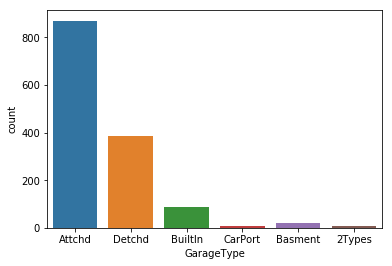

In [5]:
import seaborn as sns
for col in df.columns:
    sns.countplot(df[col])
    plt.show()

In [6]:
df[df['BsmtQual'].isnull()]

,BsmtQual,FireplaceQu,GarageType
17,NaN,NaN,CarPort
39,NaN,NaN,NaN
90,NaN,NaN,Detchd
102,NaN,NaN,Attchd
156,NaN,NaN,Detchd
182,NaN,Gd,Attchd
259,NaN,NaN,Detchd
342,NaN,NaN,Detchd
362,NaN,Ex,BuiltIn
371,NaN,Gd,Detchd


In [7]:
df1=df.copy()
for col in df1.columns:
    df1[col+'mode_imputation']=np.where(df[col].isnull(),df[col].mode(),df[col])
df1['BsmtQualmode_imputation'].isnull().sum()

0

In [8]:
df1['BsmtQualmode_imputation'].isnull().sum()
df1['FireplaceQumode_imputation'].isnull().sum()
df1['GarageTypemode_imputation'].isnull().sum()

0

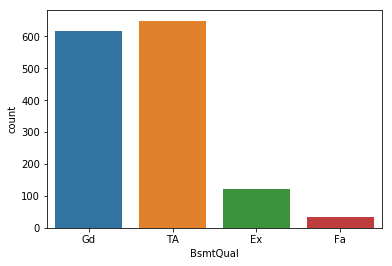

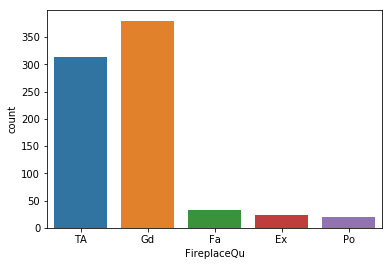

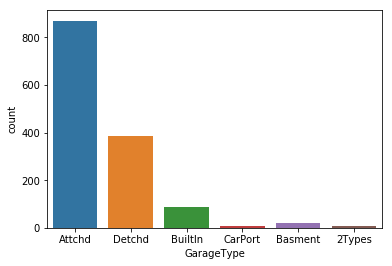

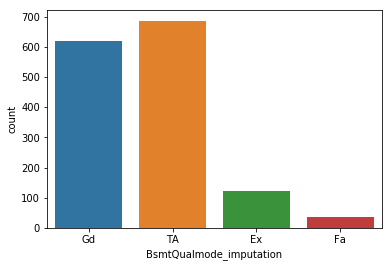

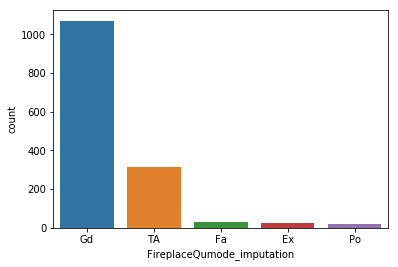

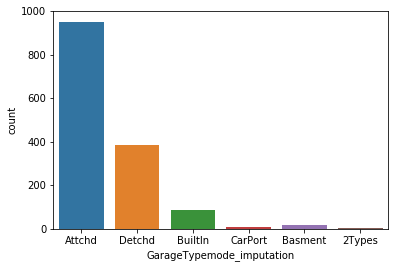

In [9]:
for col in df1.columns:
    sns.countplot(df1[col])
    plt.show()

In [10]:
for col in df1.columns:
    print("The number of null values in {} is {}".format(col,df1[col].value_counts()))

The number of null values in BsmtQual is TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
The number of null values in FireplaceQu is Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
The number of null values in GarageType is Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
The number of null values in BsmtQualmode_imputation is TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQualmode_imputation, dtype: int64
The number of null values in FireplaceQumode_imputation is Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQumode_imputation, dtype: int64
The number of null values in GarageTypemode_imputation is Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageTypemode_imputation, dtype: int64


In [12]:
df1=df.copy()
for col in df1.columns:
    random_sample=df1[col].dropna().sample(df[col].isnull().sum(),random_state=42)
    random_sample.index=df[df[col].isnull()].index
    df1.loc[df1[col].isnull(),col]=random_sample
df1.head()

,BsmtQual,FireplaceQu,GarageType
0,Gd,TA,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd


In [13]:
print(df1['BsmtQual'].isnull().sum())
print(df1['FireplaceQu'].isnull().sum())
df1['GarageType'].isnull().sum()

0
0


0

In [14]:
df1=df.copy()
for col in df1.columns:
    df1[col+'NA']=np.where(df1[col].isnull(),1,0)
    df1[col]=np.where(df1[col].isnull(),df1[col].mode(),df[col])
df1.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQualNA,FireplaceQuNA,GarageTypeNA
0,Gd,Gd,Attchd,0,1,0
1,Gd,TA,Attchd,0,0,0
2,Gd,TA,Attchd,0,0,0
3,TA,Gd,Detchd,0,0,0
4,Gd,TA,Attchd,0,0,0


In [15]:
df1=df.copy()
for col in df1.columns:
    #df1[col+'NA']=np.where(df1[col].isnull(),1,0)
    df1[col]=np.where(df1[col].isnull(),'Missing',df[col])
df1.head()

,BsmtQual,FireplaceQu,GarageType
0,Gd,Missing,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd
